In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from scipy.signal import lfilter
from IPython import display

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy
from keras.datasets import imdb
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras import activations

from keras.layers import Activation, Dense

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.layers import Dense, Softmax, Dropout, BatchNormalization

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [1]:
import sys
from pathlib import Path
# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)
from preprocessing import import_preprocessed_data
from train import create_windows_smoothed, create_train_val_test_split
from predict import predict_values, predict_values_with_gradient

Here we will create an LSTM with daily data as input

In [2]:
dfs_c_0, dfs_c_1, dfs_c_2, dfs_c_0_grouped, dfs_c_1_grouped, dfs_c_2_grouped = import_preprocessed_data() # import all data

In [3]:
all_grouped = []
all_grouped = [*dfs_c_0_grouped, *dfs_c_1_grouped, *dfs_c_2_grouped]

The model was trained on google scholar, so we will just show the code here and import the model.

In [8]:
# create lstm input
X,y = create_windows_smoothed(all_grouped, 10, 1, 5)
#Split data into train & test set & validation set 
X_train, y_train, X_test, y_test, X_val, y_val = create_train_val_test_split(X,y)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(1904, 10, 1)
(1904, 1)
(477, 10, 1)
(477, 1)
(596, 10, 1)
(596, 1)


In [13]:
# build lstm 
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape= (10, 1)))
model.add(LSTM(200))
model.add(Dense(1, activation='relu'))

#optimizer = optimizers.Adam(clipvalue=0.5)
adam = tf.keras.optimizers.Adam(learning_rate=0.001) # , clipnorm=1
model.compile(optimizer=adam, loss='mse',metrics=['mean_absolute_error'])

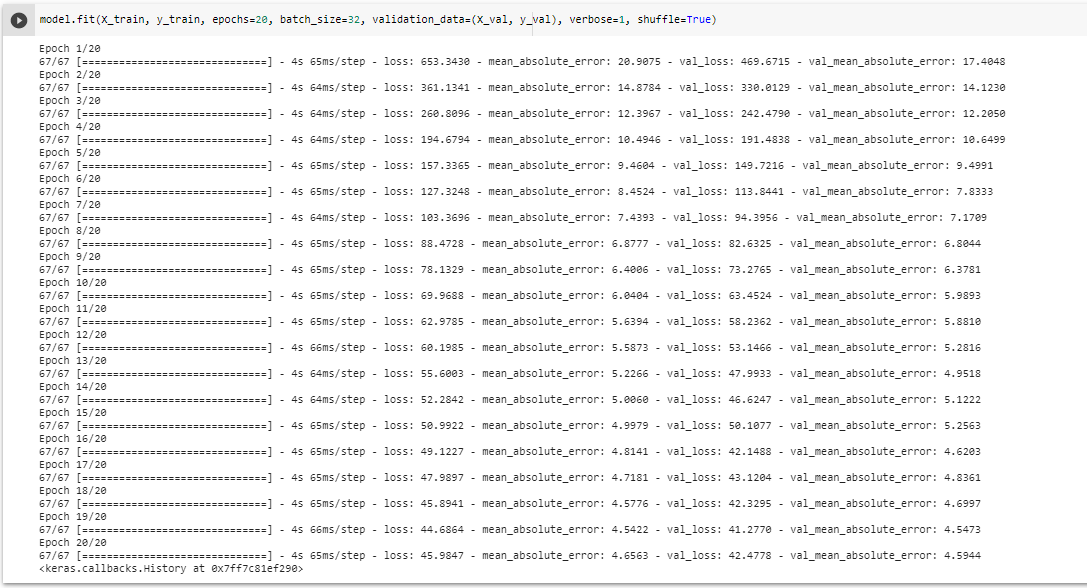

In [5]:
display.Image("../notebooks/Training_LSTM_overall_grouped.png")

In [6]:
from keras.models import load_model
model = load_model('../models/overall_grouped_lstm.h5')

In [7]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 10, 200)           161600    
_________________________________________________________________
lstm_43 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 201       
Total params: 482,601
Trainable params: 482,601
Non-trainable params: 0
_________________________________________________________________


Give an input that mimics an empty container. 

In [14]:
initial_set = []
for i in range(1, 11, 1):
  initial_set.append(140)
initial_set = np.array(initial_set)
initial = initial_set
initial_set

array([140, 140, 140, 140, 140, 140, 140, 140, 140, 140])

In [8]:
start_values = initial_set
result = predict_values_with_gradient(model, initial_set, initial, 300, 10) # predict 300 values with reset of the values when Height is near 0

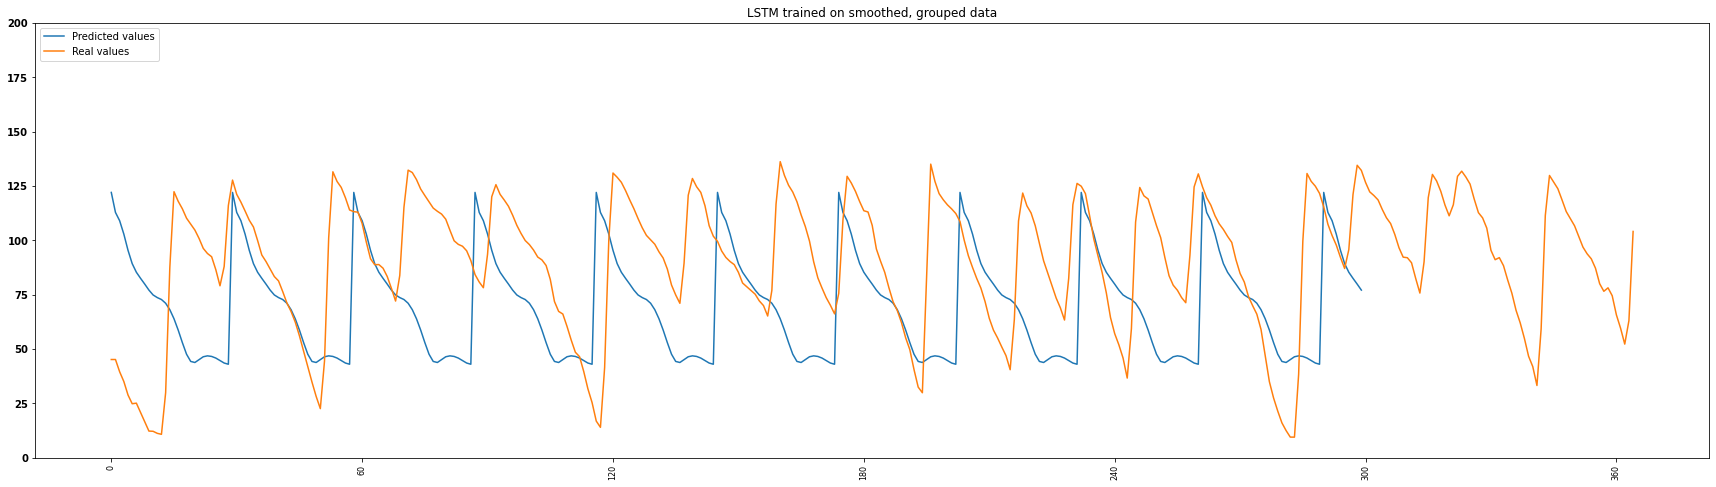

In [9]:
plt.figure(figsize=(30,8))
plt.ylim((0,200))
plt.title("LSTM trained on smoothed, grouped data")

plt.xticks(np.arange(0, 500, step=60), fontsize=8, rotation=90, )
plt.yticks(fontsize=10, fontweight='bold')
plt.plot(result)
plt.plot(all_grouped[18]['inter_pol'])

plt.legend(['Predicted values', 'Real values'], loc='upper left')

plt.show()

Get gradient of predicted curve

In [11]:
result[:20]

[121.99032,
 112.78405,
 108.96641,
 102.81338,
 95.36652,
 89.245316,
 85.26775,
 82.47776,
 79.82659,
 77.067505,
 74.83155,
 73.626366,
 72.73183,
 71.02275,
 68.057526,
 63.88143,
 58.691452,
 52.913746,
 47.57524,
 44.25819]

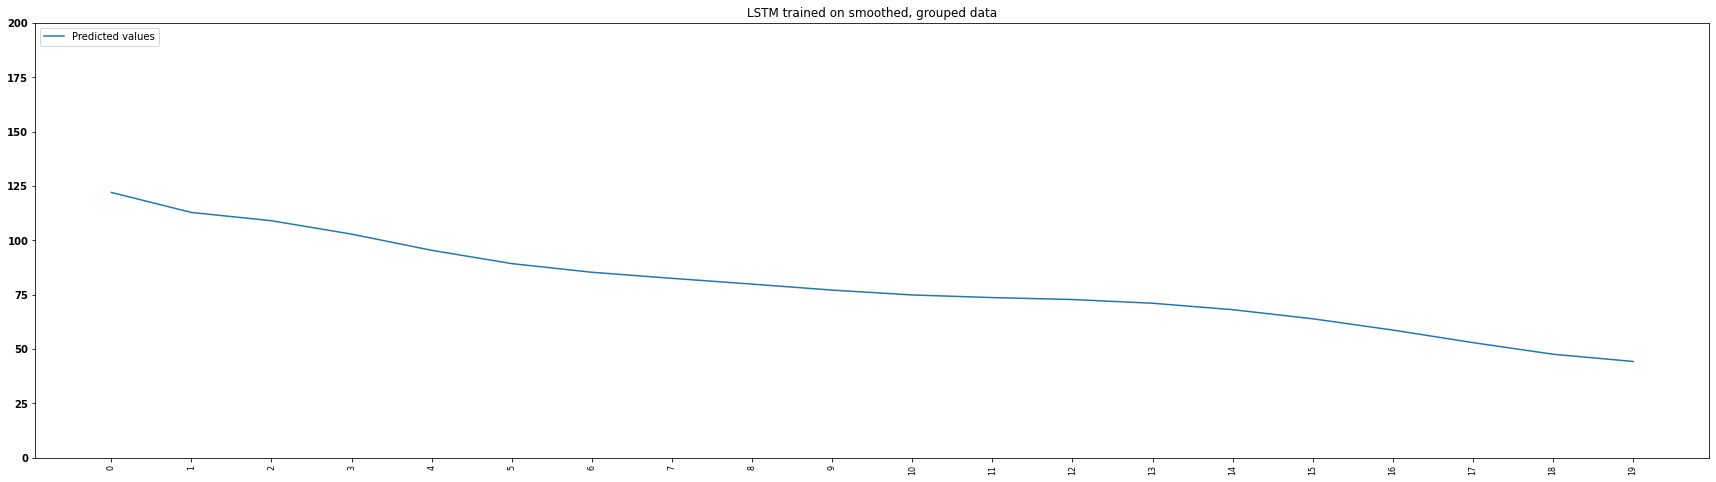

In [14]:
plt.figure(figsize=(30,8))
plt.ylim((0,200))
plt.title("LSTM trained on smoothed, grouped data")

plt.xticks(np.arange(0, 20, step=1), fontsize=8, rotation=90, )
plt.yticks(fontsize=10, fontweight='bold')
plt.plot(result[:20])

plt.legend(['Predicted values', 'Real values'], loc='upper left')

plt.show()

In [15]:
# calculate gradient of first 30 values
gradient_30 = np.gradient(result3[:20])
avg_30 = sum(gradient_30) / len(gradient_30)
avg_30

-4.1996893882751465

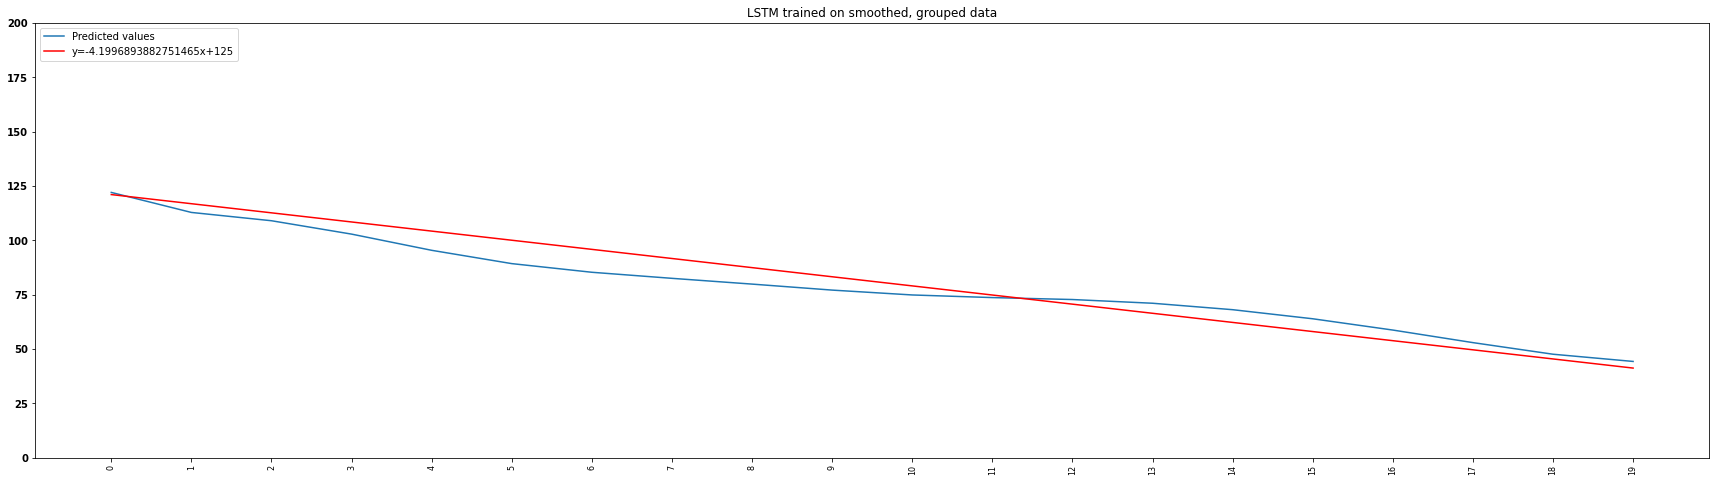

In [18]:
plt.figure(figsize=(30,8))
plt.ylim((0,200))
plt.title("LSTM trained on smoothed, grouped data")

x = np.linspace(0,19,100)
y = avg_30*x+121

plt.xticks(np.arange(0, 20, step=1), fontsize=8, rotation=90, )
plt.yticks(fontsize=10, fontweight='bold')
plt.plot(result3[:20])
plt.plot(x, y, '-r')

plt.legend(['Predicted values', 'y=' + str(avg_30) + 'x+121'], loc='upper left')

plt.show()

When will curve be 0?

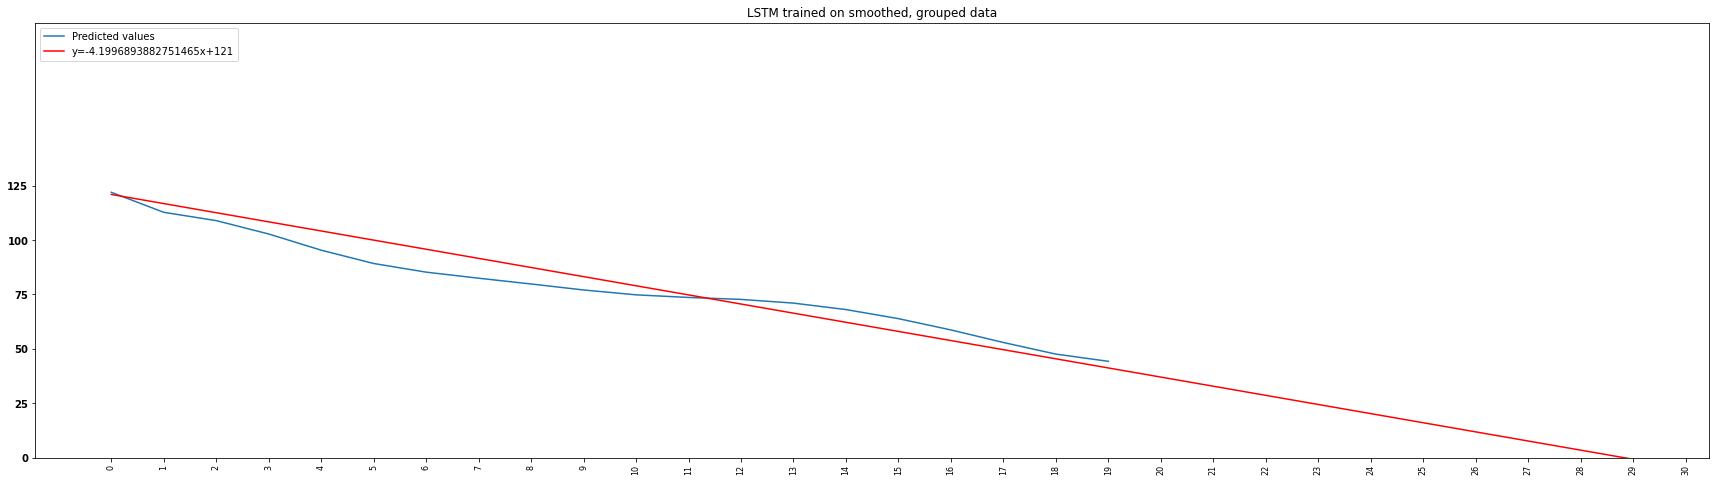

In [26]:
plt.figure(figsize=(30,8))
plt.ylim((0,200))
plt.title("LSTM trained on smoothed, grouped data")

x = np.linspace(0,29,100)
y = avg_30*x+121

plt.xticks(np.arange(0, 31, step=1), fontsize=8, rotation=90, )
plt.yticks(np.arange(0, 150, step=25), fontsize=10, fontweight='bold')
plt.plot(result3[:20])
plt.plot(x, y, '-r')

plt.legend(['Predicted values', 'y=' + str(avg_30) + 'x+121'], loc='upper left')

plt.show()

The curve shows, that the container needs to be emptied after 29 days.

In [35]:
# calculate values for one year
values = []
for j in range(0, 12, 1):
    for i in range(0, 29, 1):
        values.append(avg_30*i+121)

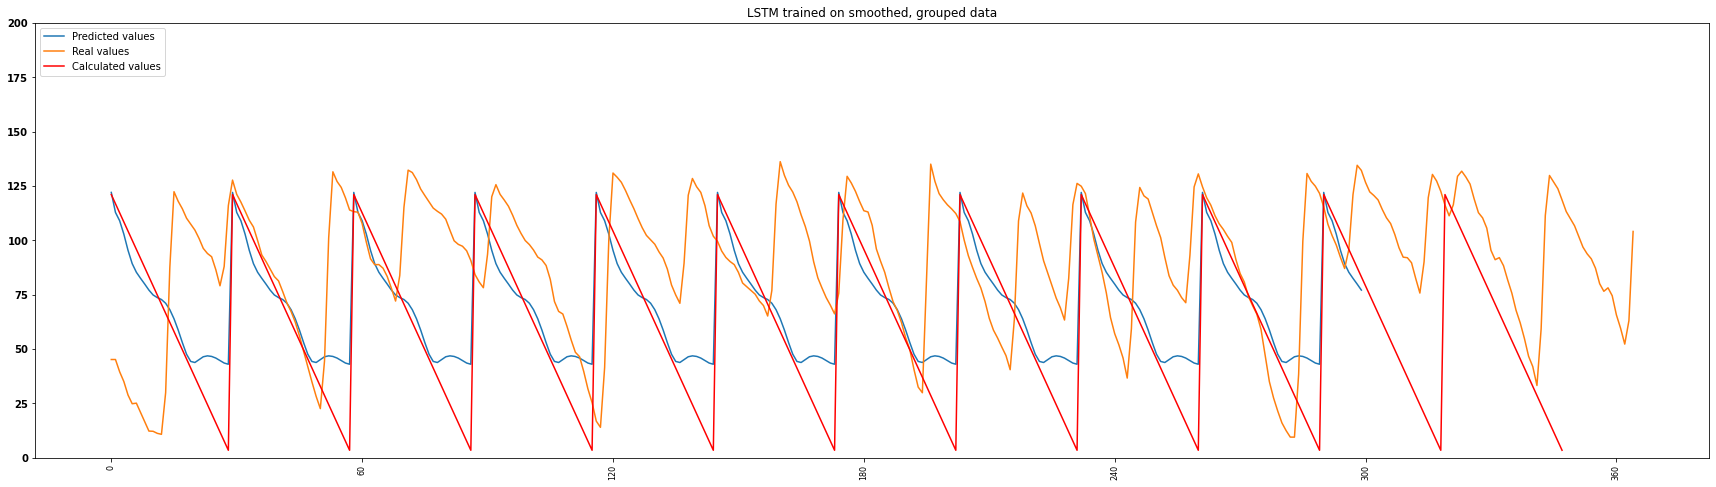

In [37]:
plt.figure(figsize=(30,8))
plt.ylim((0,200))
plt.title("LSTM trained on smoothed, grouped data")

plt.xticks(np.arange(0, 500, step=60), fontsize=8, rotation=90, )
plt.yticks(fontsize=10, fontweight='bold')
plt.plot(result)
plt.plot(all_grouped[18]['inter_pol'])
plt.plot(values, '-r')

plt.legend(['Predicted values', 'Real values', 'Calculated values'], loc='upper left')

plt.show()

Shortcoming: The model predicts values smaller than 125, but the height of the container is 140. The calculation can be done for this height without a problem. 